In [ ]:
from sklearn.datasets import fetch_mldata

In [2]:
mnist = fetch_mldata('MNIST original')

In [3]:
mnist

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([ 0.,  0.,  0., ...,  9.,  9.,  9.])}

In [4]:
X, y = mnist['data'], mnist['target']

In [5]:
X.shape

(70000, 784)

In [6]:
y.shape

(70000,)

In [7]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [8]:
some_digit = X[36000]

In [9]:
some_digit_image = some_digit.reshape(28, 28)

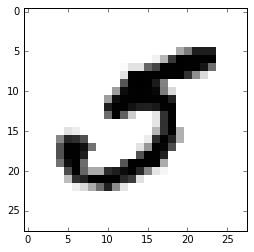

In [10]:
plt.imshow(some_digit_image,
           cmap = matplotlib.cm.binary,
           interpolation = "nearest")

(0.0, 1.0, 0.0, 1.0)

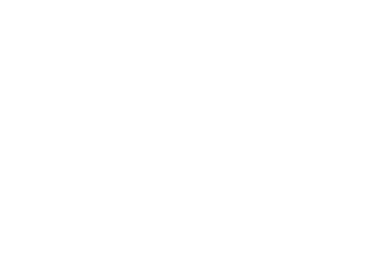

In [11]:
plt.axis("off")

In [12]:
plt.show()

In [13]:
y[36000]

5.0

### image 36000 is a 5, and image appears like a 5

In [14]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [15]:
import numpy as np
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

# Training a binary classifier

In [16]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [17]:
from sklearn.linear_model import SGDClassifier

In [18]:
sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=42, shuffle=True, verbose=0,
       warm_start=False)

In [19]:
sgd_clf.predict([some_digit])

array([ True], dtype=bool)

# Performance Measures

## Measuring Accuracy Using Cross-Validation

In [20]:
from sklearn.cross_validation import cross_val_score

In [21]:
cross_val_score(sgd_clf, X_train, y_train_5,
               cv = 3,
               scoring = "accuracy")

array([ 0.9625 ,  0.96525,  0.96875])

In [22]:
from sklearn.base import BaseEstimator

In [23]:
class Never5Classifier(BaseEstimator):
    def fit(self, X, y = None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype = bool)

In [24]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf,
               X_train,
               y_train_5,
               cv = 3,
               scoring = "accuracy")

array([ 0.9088 ,  0.91205,  0.9081 ])

## Confusion Matrix

In [25]:
from sklearn.cross_validation import cross_val_predict

In [26]:
y_train_pred = cross_val_predict(sgd_clf, 
                                X_train,
                                y_train_5,
                                cv = 3)

In [27]:
len(y_train_pred)

60000

In [28]:
from sklearn.metrics import confusion_matrix

In [29]:
confusion_matrix(y_train_5, y_train_pred)

array([[53635,   944],
       [ 1126,  4295]])

In [30]:
confusion_matrix(y_train_5, y_train_5)

array([[54579,     0],
       [    0,  5421]])

## Precision (accuracy of predicted yes) and Recall (Percentage of yes detected)

In [31]:
from sklearn.metrics import precision_score, recall_score

### Precision with sklearn

In [32]:
precision_score(y_train_5, y_train_pred)

0.81981294140103078

### Precision by hand

In [33]:
float(4586)/(2820+4586)

0.6192276532541183

### Recall by sklearn

In [34]:
recall_score(y_train_5, y_train_pred)

0.79228924552665558

### Recall by hand

In [35]:
float(4586)/(835+4586)

0.8459693783434791

### F1 Scores

In [36]:
from sklearn.metrics import f1_score

In [37]:
f1_score(y_train_5, y_train_pred)

0.80581613508442773

## Precision/Recall Tradeoff

In [38]:
y_scores = sgd_clf.decision_function([some_digit])

In [39]:
y_scores

array([ 42635.99304987])

In [40]:
threshold = 0

In [41]:
y_some_digit_pred = (y_scores > threshold)

In [42]:
y_some_digit_pred

array([ True], dtype=bool)

In [43]:
threshold = 200000

In [44]:
y_some_digit_pred = (y_scores > threshold)

In [45]:
y_some_digit_pred

array([False], dtype=bool)

In [46]:
y_scores = cross_val_predict(sgd_clf,
                            X_train,
                            y_train_5,
                            cv = 3)

In [47]:
len(y_scores)

60000

In [48]:
y_scores

array([ True, False, False, ..., False, False, False], dtype=bool)

In [49]:
from sklearn.metrics import precision_recall_curve

In [50]:
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [54]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label = "Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label = "Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])

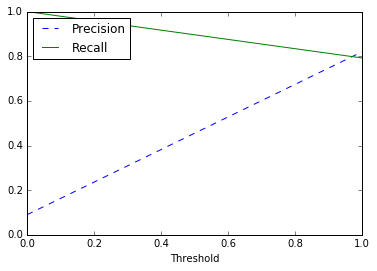

In [56]:
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()